In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from keras.utils.np_utils import to_categorical
from sklearn.decomposition import PCA # 主成分分析
from sklearn.pipeline import make_pipeline
import seaborn as sns 
train = pd.read_csv('train_july.csv')
test = pd.read_csv('test_july.csv')
train.head()

Using TensorFlow backend.


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [2]:
# 提取标签和特征
X_label = train['label']
X_train = train.drop(['label'],axis=1)
print(X_train.isnull().any().describe())
print(test.isnull().any().describe())

count       784
unique        1
top       False
freq        784
dtype: object
count       785
unique        1
top       False
freq        785
dtype: object


In [3]:
# 把图片转化为灰度图片
X_train= X_train/255.0
X_test = test/255.0

In [4]:
# 图片转换为正方形
X_train_reshape = X_train.values.reshape(-1,28,28,1)

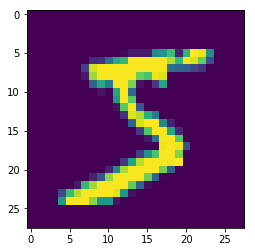

In [5]:
plt.imshow(X_train_reshape[0][:,:,0])

In [6]:
X_test = X_test.drop(labels=['index'],axis=1)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
X_test_reshape = X_test.values.reshape(-1,28,28,1)

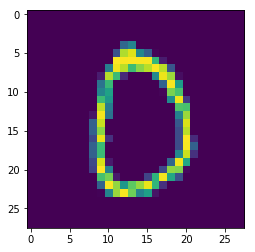

In [8]:
plt.imshow(X_test_reshape[0][:,:,0])

In [9]:
"""转换为one-hot"""
# 数组
X_label_one_hot = to_categorical(X_label,num_classes=10)
# print(X_label_one_hot[0])
# dataform 类型
X_label_two = pd.get_dummies(X_label)
# print(X_label_two.values[0])

# 一维向量
X_train_three = X_train
X_label_three = X_label
# print(X_train_three)
# print(X_label_three)
# print(X_train_three.shape,X_label_three.shape)

In [10]:
from sklearn.model_selection import train_test_split
"""
训练数据切割为训练和测试
为了使得每次切分的数据都一样
"""
def esimate_score(clf,X_train_three,X_label_three):
    x_train,x_test,y_train,y_test = train_test_split(X_train_three,X_label_three,test_size=0.1,random_state=1)
    clf.fit(x_train,y_train)
    return clf.score(x_test,y_test)

In [ ]:
"""
不同特征数量下，评分数
"""
clf = KNeighborsClassifier()
dimen_number = ([
    1,2,5,10,20,
    50,
    100,200,500
])
score_array = np.zeros(len(dimen_number))
i=0
for dimen in dimen_number:
    
    pca = PCA(n_components=dimen)
    transform = pca.fit_transform(X_train_three.iloc[:60000])
    score_list = esimate_score(clf,transform,X_label_three.iloc[:60000])
    score_array[i]=score_list
    i+=1
print(score_array)

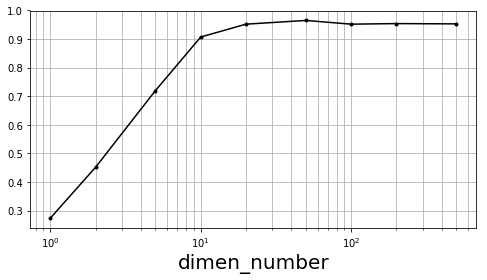

In [13]:
plt.figure(figsize=(8,4))
plt.plot(np.array(dimen_number),score_array,'k.-') # ‘k-'带有点的折线图
plt.xscale('log') # 使之平均化
plt.xlabel('dimen_number',size=20)
plt.grid(which='both') # 带有网格

In [16]:
"""
随机森林
"""
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)  # 随机森林参数
pca = PCA(n_components=dimen)

transform = pca.fit_transform(X_train_three.iloc[:60000])
x_train,x_test,y_train,y_test = train_test_split(transform,X_label_three.iloc[:60000],test_size=0.1,random_state=3)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
rfc.score(x_test,y_test)

0.9143333333333333